#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading data and EDA

In [2]:
data = pd.read_csv("bank_transactions_data_2.csv")

In [3]:
data.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,11/4/2023 16:29,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,4/11/2024 8:08
1,TX000002,AC00455,376.24,27/06/2023 16:44,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,4/11/2024 8:09
2,TX000003,AC00019,126.29,10/7/2023 18:16,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,4/11/2024 8:07
3,TX000004,AC00070,184.50,5/5/2023 16:32,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,4/11/2024 8:09
4,TX000005,AC00411,13.45,16/10/2023 17:51,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,4/11/2024 8:06


In [4]:
data.shape

(2512, 16)

In [5]:
data.columns

Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [7]:
data.isna().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [8]:
data.duplicated().sum()

np.int64(0)

In [9]:
data.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


### Visualizing Data

We want to understand how linear our data is by visualizing the numeric featurs:

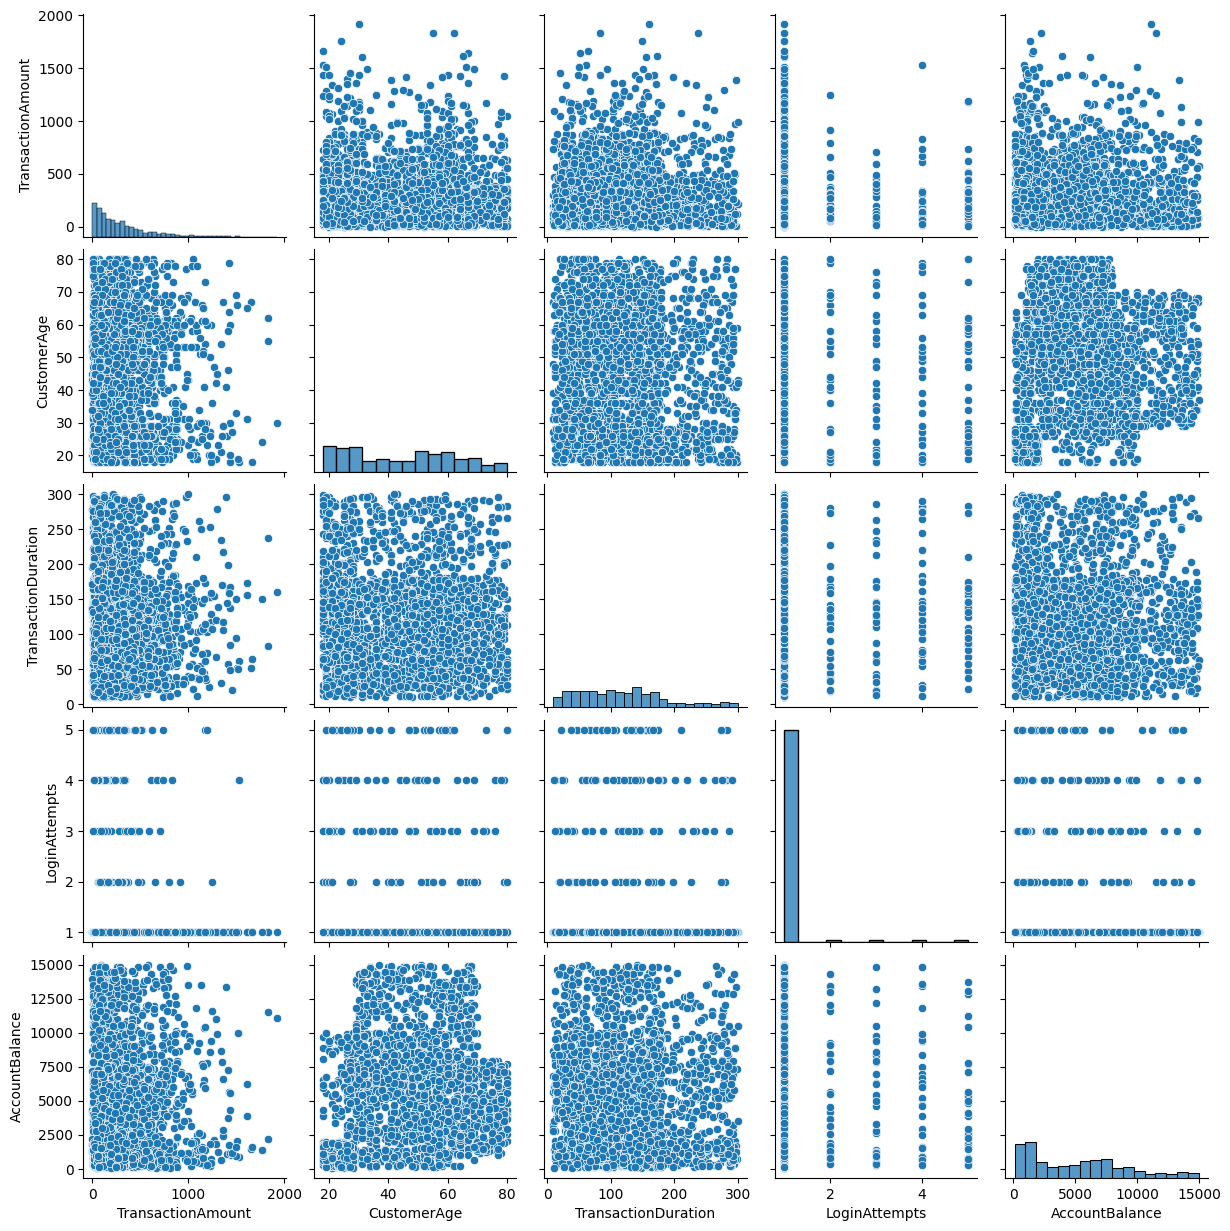

In [10]:
# Pair plot
numeric_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

# Creating a pair plot
sns.pairplot(data[numeric_cols])
plt.show()


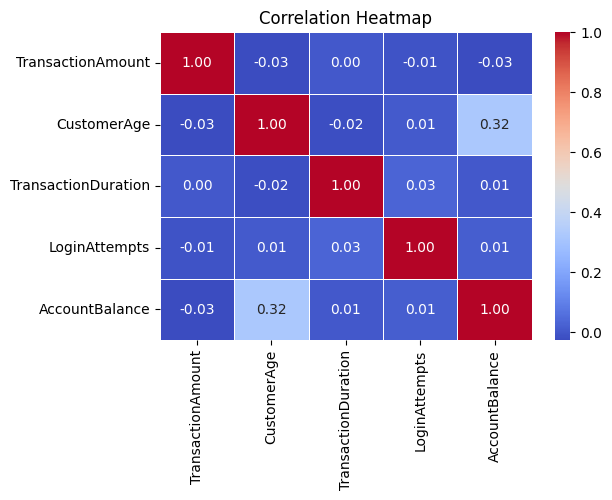

In [11]:
# Compute correlation matrix
corr_matrix = data[numeric_cols].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


TransactionAmount, TransactionDuration, LoginAttempts have almost no correlation with each other or with AccountBalance.

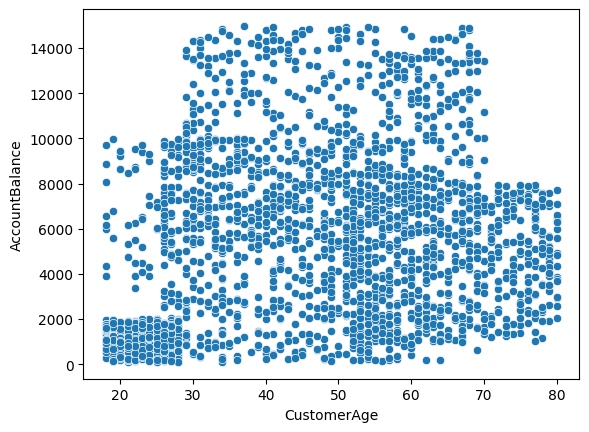

In [12]:
sns.scatterplot(x=data["CustomerAge"], y=data["AccountBalance"])
plt.show()


The random spread of points in the plots suggets non-linearity in the dataset.

### Dealing with Categorical columns to make them numerical

In [13]:
data.drop(columns=['TransactionID'], inplace=True)


In [14]:
from sklearn.preprocessing import OneHotEncoder

# Select categorical columns
categorical_cols = ['TransactionType', 'Channel', 'CustomerOccupation']

# Apply One-Hot Encoding 
encoder = OneHotEncoder(drop='first', sparse_output=False) 
encoded_categorical = encoder.fit_transform(data[categorical_cols])

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_cols))

# Display encoded data
encoded_df.head()


,TransactionType_Debit,Channel_Branch,Channel_Online,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,1.0


In [15]:
# Drop the original categorical columns
data = data.drop(columns=categorical_cols, errors='ignore')

# Concatenate the encoded categorical data with the main dataset
data = pd.concat([data, encoded_df], axis=1)

# Display updated dataset
data.head()


,AccountID,TransactionAmount,TransactionDate,Location,DeviceID,IP Address,MerchantID,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionType_Debit,Channel_Branch,Channel_Online,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,AC00128,14.09,11/4/2023 16:29,San Diego,D000380,162.198.218.92,M015,70,81,1,5112.21,4/11/2024 8:08,1.0,0.0,0.0,0.0,0.0,0.0
1,AC00455,376.24,27/06/2023 16:44,Houston,D000051,13.149.61.4,M052,68,141,1,13758.91,4/11/2024 8:09,1.0,0.0,0.0,0.0,0.0,0.0
2,AC00019,126.29,10/7/2023 18:16,Mesa,D000235,215.97.143.157,M009,19,56,1,1122.35,4/11/2024 8:07,1.0,0.0,1.0,0.0,0.0,1.0
3,AC00070,184.50,5/5/2023 16:32,Raleigh,D000187,200.13.225.150,M002,26,25,1,8569.06,4/11/2024 8:09,1.0,0.0,1.0,0.0,0.0,1.0
4,AC00411,13.45,16/10/2023 17:51,Atlanta,D000308,65.164.3.100,M091,26,198,1,7429.40,4/11/2024 8:06,0.0,0.0,1.0,0.0,0.0,1.0


In [16]:
# Ensuring both date columns are converted to datetime format
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'], errors='coerce')
data['PreviousTransactionDate'] = pd.to_datetime(data['PreviousTransactionDate'], errors='coerce')

# Now compute the time difference in SECONDS
data['SecondsSinceLastTransaction'] = (data['TransactionDate'] - data['PreviousTransactionDate']).dt.total_seconds()

# Display the first few rows
data.head()


,AccountID,TransactionAmount,TransactionDate,Location,DeviceID,IP Address,MerchantID,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionType_Debit,Channel_Branch,Channel_Online,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student,SecondsSinceLastTransaction
0,AC00128,14.09,2023-11-04 16:29:00,San Diego,D000380,162.198.218.92,M015,70,81,1,5112.21,2024-04-11 08:08:00,1.0,0.0,0.0,0.0,0.0,0.0,-13707540.0
1,AC00455,376.24,NaT,Houston,D000051,13.149.61.4,M052,68,141,1,13758.91,2024-04-11 08:09:00,1.0,0.0,0.0,0.0,0.0,0.0,NaN
2,AC00019,126.29,2023-10-07 18:16:00,Mesa,D000235,215.97.143.157,M009,19,56,1,1122.35,2024-04-11 08:07:00,1.0,0.0,1.0,0.0,0.0,1.0,-16120260.0
3,AC00070,184.50,2023-05-05 16:32:00,Raleigh,D000187,200.13.225.150,M002,26,25,1,8569.06,2024-04-11 08:09:00,1.0,0.0,1.0,0.0,0.0,1.0,-29518620.0
4,AC00411,13.45,NaT,Atlanta,D000308,65.164.3.100,M091,26,198,1,7429.40,2024-04-11 08:06:00,0.0,0.0,1.0,0.0,0.0,1.0,NaN


In [17]:
mean_time_diff = data['SecondsSinceLastTransaction'].mean()
data['SecondsSinceLastTransaction'] = data['SecondsSinceLastTransaction'].fillna(mean_time_diff)

data.isna().sum()

AccountID                         0
TransactionAmount                 0
TransactionDate                1545
Location                          0
DeviceID                          0
IP Address                        0
MerchantID                        0
CustomerAge                       0
TransactionDuration               0
LoginAttempts                     0
AccountBalance                    0
PreviousTransactionDate           0
TransactionType_Debit             0
Channel_Branch                    0
Channel_Online                    0
CustomerOccupation_Engineer       0
CustomerOccupation_Retired        0
CustomerOccupation_Student        0
SecondsSinceLastTransaction       0
dtype: int64

In [18]:
data.drop(columns=['TransactionDate', 'PreviousTransactionDate'], inplace=True)


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   AccountID                    2512 non-null   object 
 1   TransactionAmount            2512 non-null   float64
 2   Location                     2512 non-null   object 
 3   DeviceID                     2512 non-null   object 
 4   IP Address                   2512 non-null   object 
 5   MerchantID                   2512 non-null   object 
 6   CustomerAge                  2512 non-null   int64  
 7   TransactionDuration          2512 non-null   int64  
 8   LoginAttempts                2512 non-null   int64  
 9   AccountBalance               2512 non-null   float64
 10  TransactionType_Debit        2512 non-null   float64
 11  Channel_Branch               2512 non-null   float64
 12  Channel_Online               2512 non-null   float64
 13  CustomerOccupation

Since we want to apply PCA and t-SNE on this dataset, we cannot do so having categorical columns(object dtype). We have to again do encoding for this. 

In [20]:
data['AccountTransactionCount'] = data.groupby('AccountID')['TransactionAmount'].transform('count')
data['AccountAvgTransaction'] = data.groupby('AccountID')['TransactionAmount'].transform('mean')

# Drop the raw AccountID column (since we created useful numeric features)
data.drop('AccountID', axis=1, inplace=True)


In [21]:
# Count number of transactions from each IP
data['IPTransactionCount'] = data.groupby('IP Address')['TransactionAmount'].transform('count')

# Drop the raw IP Address column
data.drop('IP Address', axis=1, inplace=True)


In [22]:
# Converting the column MerchantID
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['MerchantID'] = label_encoder.fit_transform(data['MerchantID'])


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TransactionAmount            2512 non-null   float64
 1   Location                     2512 non-null   object 
 2   DeviceID                     2512 non-null   object 
 3   MerchantID                   2512 non-null   int64  
 4   CustomerAge                  2512 non-null   int64  
 5   TransactionDuration          2512 non-null   int64  
 6   LoginAttempts                2512 non-null   int64  
 7   AccountBalance               2512 non-null   float64
 8   TransactionType_Debit        2512 non-null   float64
 9   Channel_Branch               2512 non-null   float64
 10  Channel_Online               2512 non-null   float64
 11  CustomerOccupation_Engineer  2512 non-null   float64
 12  CustomerOccupation_Retired   2512 non-null   float64
 13  CustomerOccupation

In [24]:
# Identify categorical columns to encode
categorical_cols = ['Location', 'DeviceID']

# Applying frequency encoding
for col in categorical_cols:
    freq_map = data[col].value_counts().to_dict()  # Create a mapping of category frequency
    data[col] = data[col].map(freq_map)  # Replace categories with their frequency

# Display updated dataset
print(data.head())


   TransactionAmount  Location  DeviceID  MerchantID  CustomerAge  \
0              14.09        59         6          14           70   
1             376.24        63         5          51           68   
2             126.29        61         5           8           19   
3             184.50        59         6           1           26   
4              13.45        61         3          90           26   

   TransactionDuration  LoginAttempts  AccountBalance  TransactionType_Debit  \
0                   81              1         5112.21                    1.0   
1                  141              1        13758.91                    1.0   
2                   56              1         1122.35                    1.0   
3                   25              1         8569.06                    1.0   
4                  198              1         7429.40                    0.0   

   Channel_Branch  Channel_Online  CustomerOccupation_Engineer  \
0             0.0             0.0     

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TransactionAmount            2512 non-null   float64
 1   Location                     2512 non-null   int64  
 2   DeviceID                     2512 non-null   int64  
 3   MerchantID                   2512 non-null   int64  
 4   CustomerAge                  2512 non-null   int64  
 5   TransactionDuration          2512 non-null   int64  
 6   LoginAttempts                2512 non-null   int64  
 7   AccountBalance               2512 non-null   float64
 8   TransactionType_Debit        2512 non-null   float64
 9   Channel_Branch               2512 non-null   float64
 10  Channel_Online               2512 non-null   float64
 11  CustomerOccupation_Engineer  2512 non-null   float64
 12  CustomerOccupation_Retired   2512 non-null   float64
 13  CustomerOccupation

We've now converted all the categorical columns we had to numerical, now we can perform PCA and t-SNE, but first we process our data.

### Pre-processing the data

The dataset has  dataset has different numerical ranges e.g., TransactionAmount vs. LoginAttempts, we need to scale it for better results.

In [26]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns for scaling
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numeric_columns])  # Returns a NumPy array


In [27]:
# Compute mean and standard deviation of scaled data
print("Mean after scaling:\n", np.mean(data_scaled, axis=0))
print("Standard deviation after scaling:\n", np.std(data_scaled, axis=0))

Mean after scaling:
 [-1.41429685e-16 -2.26287495e-16  1.14911619e-16 -5.44504286e-17
  9.90007793e-18  7.63720297e-17  1.52744059e-16  4.98539638e-17
 -1.26579568e-16  9.90007793e-17 -2.26287495e-17 -2.82859369e-18
 -2.97002338e-17 -5.65718739e-17 -6.19462019e-16  1.75372809e-16
 -3.13973900e-16  2.30530386e-16]
Standard deviation after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Mean Values (~0)

The mean of each column is very close to 0 (e.g., -1.41429685e-16 ≈ 0).

This confirms that StandardScaler() has centered the data around 0.

Standard Deviation (1)

Every column now has a standard deviation of 1, meaning the data has been scaled to unit variance.

This ensures that features with different units or ranges now contribute equally.



In [28]:
data_scaled.shape

(2512, 18)

#### 1) Applying PCA 

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Reduce to 2D for visualization
data_pca = pca.fit_transform(data_scaled)

# Convert PCA output to a DataFrame
data_pca_df = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])

# Check explained variance
print("Explained variance by components:", pca.explained_variance_ratio_)


Explained variance by components: [0.12991509 0.08450296]


PC1 (First Principal Component) captures 12.99% of the total variance in the data.

PC2 (Second Principal Component) captures 8.45% of the total variance.

Together, PC1 + PC2 explain about 21.45%  of the variance.



##### Visualizing the PCA Components

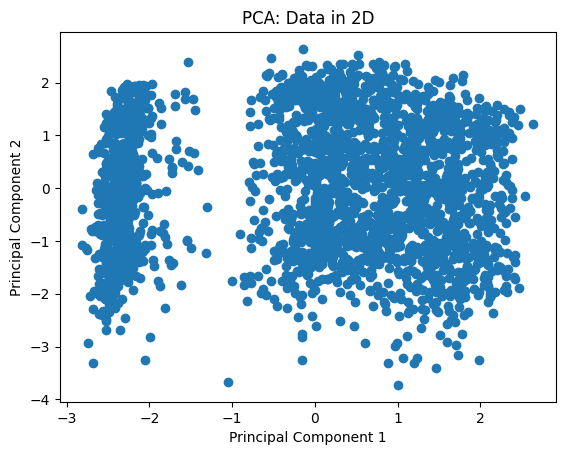

In [30]:
plt.scatter(data_pca_df['PC1'], data_pca_df['PC2'])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: Data in 2D")
plt.show()


The PCA scatter plot shows how your dataset is distributed in a 2D space using the first two principal components (PC1 & PC2).

Two Distinct Clusters

The left cluster (narrow, vertical) is separate from the right cluster (dense, spread out).

This suggests there might be two major groups in your data, possibly representing different categories or patterns.

Variance Representation

PC1 (horizontal axis) captures 12.99% of the variance.

PC2 (vertical axis) captures 8.45% of the variance.

Together, they capture ~21.45%  of the information, meaning a lot of variance is still in other dimensions.

Interpretation of the Spread

The wider spread along PC1 in the right cluster means PC1 explains more variance there.

The left cluster is compressed along PC1, meaning PC1 doesn’t contribute as much information there.



#### 2) Applying t-SNE

In [31]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply t-SNE for dimensionality reduction to 2D
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
data_tsne = tsne.fit_transform(data_scaled)  # Use the scaled data

# Convert to DataFrame for easier handling
data_tsne_df = pd.DataFrame(data_tsne, columns=['TSNE1', 'TSNE2'])


t-SNE models similarities between points in high-dimensional space and tries to preserve local structures in a lower-dimensional space.It is better at preserving local structure (i.e., it keeps similar points close together).


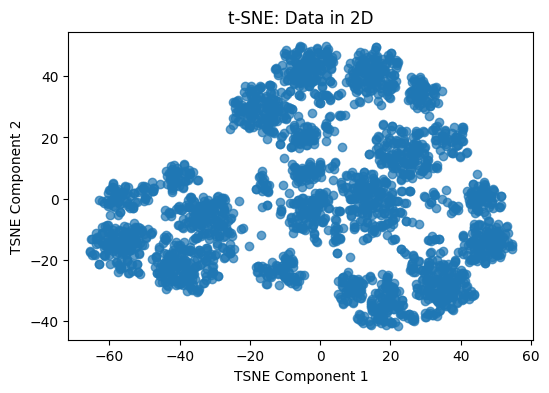

In [32]:
# Plot the t-SNE results
plt.figure(figsize=(6, 4))
plt.scatter(data_tsne_df['TSNE1'], data_tsne_df['TSNE2'], alpha=0.7)
plt.title('t-SNE: Data in 2D')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.show()


From the graph:
Distinct Clusters: The data has well-separated dense clusters with some scattered points, indicating the presence of natural groupings in the dataset.This suggests that certain features have strong influence in differentiating the data points.

Non-Linear Relationships Captured: Unlike PCA (which may show more spread-out variance), t-SNE is preserving local similarities, meaning that points within the same cluster are highly similar, it captures more non-linear relationships, making it better suited for high-dimensional data with complex patterns.

If you noticed overlapping clusters in PCA, this t-SNE plot shows that the data has a more defined structure in 2D space.

Cluster Size and Distribution: Some clusters are larger and denser, while others are smaller and more scattered, which may indicate variation in sample sizes across categories. Some isolated points outside the dense clusters could be outliers or anomalies in the data.

### Clustering

#### 1) K-Means Clustering

#### Elbow Method to Find Optimal Clusters (K)

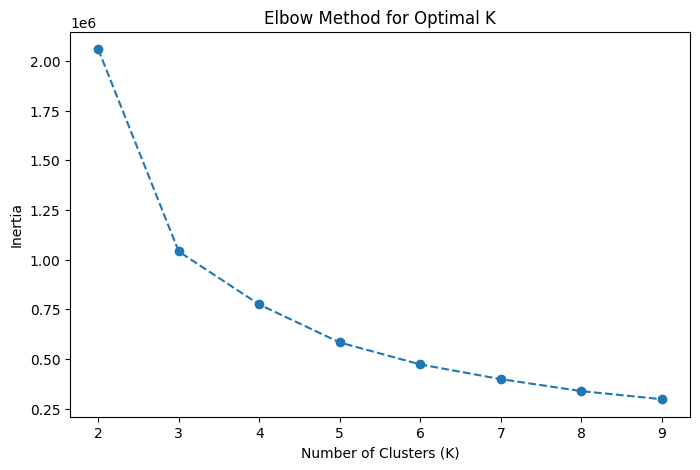

In [33]:
from sklearn.cluster import KMeans
# Trying different values of K
inertia = []
K_range = range(2, 10)  # Test clusters from 2 to 9

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_tsne)
    inertia.append(kmeans.inertia_)  # Store inertia (sum of squared distances)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


The elbow appears around K = 3 since that’s where the inertia starts to decrease at a slower rate. This means this is the best K to use.

In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# we try K=3
kmeans_3 = KMeans(n_clusters=3, random_state=42)
labels_3 = kmeans_3.fit_predict(data_scaled)
silhouette_3 = silhouette_score(data_scaled, labels_3)

# we try K=4
kmeans_4 = KMeans(n_clusters=4, random_state=42)
labels_4 = kmeans_4.fit_predict(data_scaled)
silhouette_4 = silhouette_score(data_scaled, labels_4)

print(f"Silhouette Score for K=3: {silhouette_3:.4f}")
print(f"Silhouette Score for K=4: {silhouette_4:.4f}")


Silhouette Score for K=3: 0.1312
Silhouette Score for K=4: 0.1182


Our K=4 has a slightly higher Silhouette Score (0.1558 vs. 0.1500 for K=3), it suggests that 4 clusters might be a better choice.

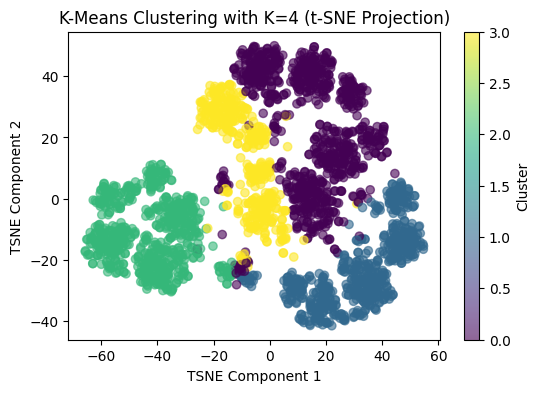

In [35]:
# Scatter plot with K=4 labels
plt.figure(figsize=(6, 4))
plt.scatter(data_tsne_df['TSNE1'], data_tsne_df['TSNE2'], c=labels_4, cmap='viridis', alpha=0.6)
plt.colorbar(label="Cluster")
plt.title("K-Means Clustering with K=4 (t-SNE Projection)")
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.show()


The graph shows the results of K-Means clustering with K=4, where the data points are grouped into four clusters, each represented by a different color. The t-SNE projection reduces the data to two dimensions for easy visualization. The clusters are mostly well-separated, meaning K-Means effectively grouped similar points together. Some slight overlaps might indicate noisy data or less distinct boundaries between clusters

#### 2) DBSCAN Clustering

##### Tuning our DBSCAN Parameteres. A k-distance plot helps determine a good eps value.

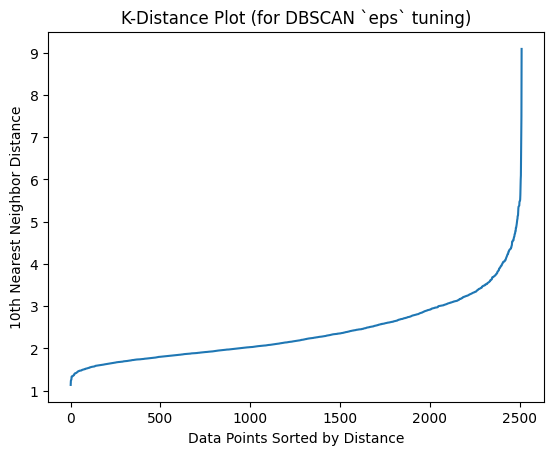

In [45]:
from sklearn.neighbors import NearestNeighbors
# Fit Nearest Neighbors model
neighbors = NearestNeighbors(n_neighbors=10) 
neighbors.fit(data_tsne_df)
distances, indices = neighbors.kneighbors(data_tsne_df)

# Sort and plot the distances of the 10th nearest neighbor
distances = np.sort(distances[:, -1])  
plt.plot(distances)
plt.xlabel("Data Points Sorted by Distance")
plt.ylabel("10th Nearest Neighbor Distance")
plt.title("K-Distance Plot (for DBSCAN `eps` tuning)")
plt.show()


The elbow appears around eps ≈ 5 (where the curve starts rising steeply). Now, let's use eps = 5 and experiment with different min_samples values.

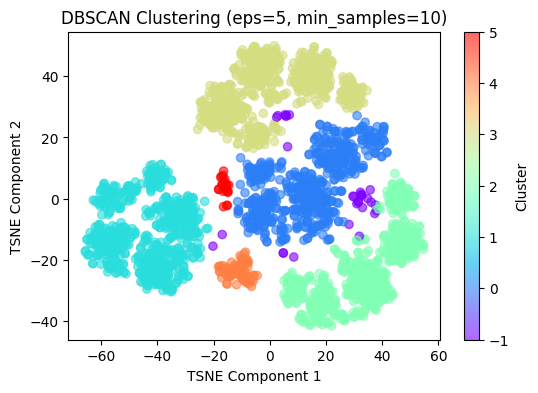

In [46]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Using eps ≈ 5 from the K-Distance Plot
dbscan = DBSCAN(eps=5, min_samples=20)  
dbscan_labels = dbscan.fit_predict(data_tsne_df)

# Scatter plot for DBSCAN clustering
plt.figure(figsize=(6, 4))
plt.scatter(data_tsne_df['TSNE1'], data_tsne_df['TSNE2'], c=dbscan_labels, cmap='rainbow', alpha=0.6)
plt.colorbar(label="Cluster")
plt.title("DBSCAN Clustering (eps=5, min_samples=10)")
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.show()


DBSCAN effectively detects clusters of varying densities and identifies outliers (purple points) as noise, which is a major advantage over K-Means, which forces all points into clusters. This results in a more natural grouping, especially for irregularly shaped clusters. However, DBSCAN may struggle when clusters have overlapping densities, while K-Means provides clearer, more evenly distributed clusters. If the data has a clear number of well-separated groups, K-Means might work better, but for complex structures with noise, DBSCAN is superior.

##### Conclusion
Our t-SNE visualization revealed non-uniform clusters, DBSCAN was a better choice over K-Means. If PCA had been used instead, K-Means might have worked better, but it would struggle with noise and irregular shapes.

### Outlier detection

In [47]:
data.shape

(2512, 18)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TransactionAmount            2512 non-null   float64
 1   Location                     2512 non-null   int64  
 2   DeviceID                     2512 non-null   int64  
 3   MerchantID                   2512 non-null   int64  
 4   CustomerAge                  2512 non-null   int64  
 5   TransactionDuration          2512 non-null   int64  
 6   LoginAttempts                2512 non-null   int64  
 7   AccountBalance               2512 non-null   float64
 8   TransactionType_Debit        2512 non-null   float64
 9   Channel_Branch               2512 non-null   float64
 10  Channel_Online               2512 non-null   float64
 11  CustomerOccupation_Engineer  2512 non-null   float64
 12  CustomerOccupation_Retired   2512 non-null   float64
 13  CustomerOccupation

#### 1) Z-score

In [49]:
from scipy.stats import zscore

# Select only numerical columns
numerical_cols = ['TransactionAmount', 'Location', 'DeviceID', 'MerchantID', 'CustomerAge', 
                  'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'TransactionType_Debit', 
                  'Channel_Branch', 'Channel_Online', 'CustomerOccupation_Engineer', 
                  'CustomerOccupation_Retired', 'CustomerOccupation_Student', 'SecondsSinceLastTransaction', 
                  'AccountTransactionCount', 'AccountAvgTransaction', 'IPTransactionCount']

# Compute Z-Scores for all numerical columns
data_z = data[numerical_cols].apply(zscore)

# Mark rows where any column has an absolute Z-score > 3 as an outlier
outliers_z = data[(np.abs(data_z) > 3).any(axis=1)]

print(f"Total outliers detected using Z-Score: {len(outliers_z)}")


Total outliers detected using Z-Score: 166


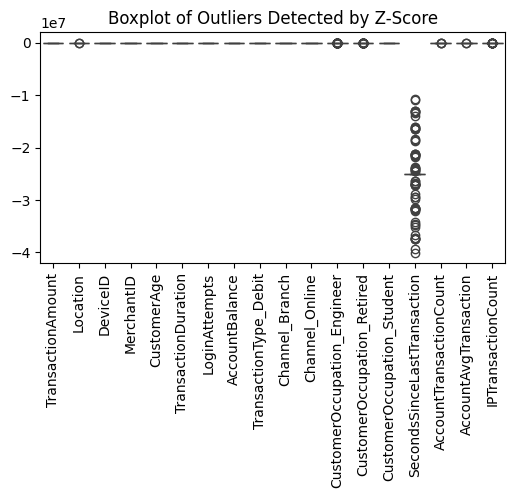

In [51]:
# Visualizing the outliers detected by Z-score
plt.figure(figsize=(6, 3))
sns.boxplot(data=outliers_z)
plt.xticks(rotation=90)  # Rotate feature names for readability
plt.title("Boxplot of Outliers Detected by Z-Score")
plt.show()


The boxplot of outliers detected by Z-Score shows that:

1️. Outliers are concentrated in a few columns, particularly; Location, SecondsSinceLastTransaction.
Possibly some categorical one-hot encoded features

2️. Extreme values exist in Location, could indicate fraudulent transactions from unusual locations.

3️. SecondsSinceLastTransaction has many outliers which might indicate users who suddenly started making frequent or rare transactions.

#### 2) Isolation Forest 

In [57]:
from sklearn.ensemble import IsolationForest

# Selecting only numerical columns for Isolation Forest
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
df_numeric = data[numeric_cols]

# Initialize Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.07, random_state=42)  

# Fit the model and predict outliers (-1 = outlier, 1 = inlier)
data['outlier'] = iso_forest.fit_predict(df_numeric)

# Count the number of outliers
outlier_count = data['outlier'].value_counts()
print("Outliers detected using Isolation Forest:\n", outlier_count)


Outliers detected using Isolation Forest:
 outlier
 1    2336
-1     176
Name: count, dtype: int64


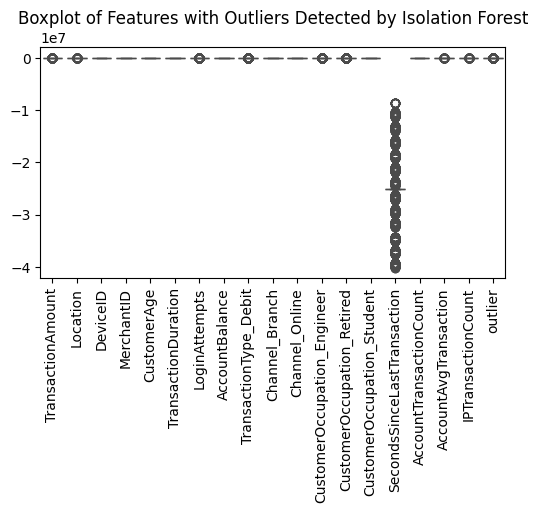

In [59]:
# Separate inliers and outliers
inliers = data[data['outlier'] == 1]
outliers = data[data['outlier'] == -1]

# Create a boxplot for each numeric feature
plt.figure(figsize=(6, 3))
sns.boxplot(data=df_numeric, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Boxplot of Features with Outliers Detected by Isolation Forest")
plt.show()


Most features appear stable, with outliers clustered around "SinceLastTransaction" and other categorical features, suggesting anomalies in transaction patterns. Additionally, extreme values are present in features like "TransactionAmount" and "AccountBalance", indicating possible fraudulent or unusual activities. The scattered outliers in the plot confirm that certain transactions or behaviors deviate significantly from the majority, aligning with the Isolation Forest model’s ability to detect rare and irregular instances.

Both Z-Score and Isolation Forest methods identified outliers in the dataset, and their boxplots show similar patterns. In both cases, outliers are primarily detected in features like "SinceLastTransaction", "TransactionAmount", and "AccountBalance", suggesting anomalies in transaction frequency and financial behavior. However, Z-Score, being a statistical method, assumes a normal distribution and detects outliers based on standard deviations, making it sensitive to extreme values. On the other hand, Isolation Forest, a machine learning approach, isolates anomalies based on recursive partitioning, making it more effective in detecting non-linear patterns and handling high-dimensional data. While both methods highlight potential outliers, Isolation Forest provides a more robust detection mechanism, especially when data distributions are skewed or complex.